# Reading the data

The full dataset was downloaded from the provided url for year 2015 in monthly installments. In order to read the data efficiently the following code was used extracting only the required columns for each question. It should be mentioned that for each question different columns of the dataset were used for computational speed reasons.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib
%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)


# Question 1
### Reading the data

At this point we are interested in finding the probability of a flight departing from that airport having a delay. 

From the whole dataset, only two columns are needed to answer this question, "ORIGIN" and "DEP_DELAY_NEW". There is a column available in the dataset labeled "DEP_DEL15" of a boolean nature, being 1(True) when then delay is bigger than 15mins, else is False. As this column returns False, for a delay of 14mins, for better accuracy the "DEP_DELAY_NEW" was used. 

In order to read the data efficiently, after specifying the path, there are a series of arguments that need to be added.
1. After opening the file with excel/notepad in order to check the formatting, the separator is assigned as ',' and there is no index column.
2. A dictionary on the "dtype" field was used to speed up the reading data process assigning the type of the values in the column appropriately.
3. The encoding of utf-8-sig was used
4. Lastly, the required columns were selected as the last argument of the read_csv command


In [2]:
jan=pd.read_csv('jan.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
feb=pd.read_csv('feb.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
mar=pd.read_csv('mar.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
apr=pd.read_csv('apr.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
may=pd.read_csv('may.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
jun=pd.read_csv('jun.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
jul=pd.read_csv('jul.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
aug=pd.read_csv('aug.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
sep=pd.read_csv('sep.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
oct=pd.read_csv('oct.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
nov=pd.read_csv('nov.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
dec=pd.read_csv('dec.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW'])
dfq1=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec])

### Solving question 1

After the Dataframe for Question1 (dfq1) has been created the procedure follows these steps

1. Group the flights by ORIGIN, that is the unique airport code 
    * a. Count the flights per ORIGIN
    * b. The aggregate fucntion mean will be used in the following question
2. Removal of the outliers(Airport with 1% lowest number of flights)
3. Compute the Delay probability
    * a. Find the total number of delayed flights
    * b. Add a column to the df DELAY_PROB. It should be noted that the delayedflights dataframe includes the outliers, but they are automatically removed when the method .groupby['ORIGIN'] is called. (As there is nothing to be grouped-by with).
4. Sort the results by Descending delay probability


It should be noted that some rows (i.e. flights) have missing data in the 'DEP_DELAY_NEW' column and they have been excluded from the calculations.


In [3]:
#STEP 1 GROUP FLIGHTS
df=dfq1.groupby(['ORIGIN'])['DEP_DELAY_NEW'].agg(['count','mean'])
#STEP 2 REMOVE OUTLIERS
df=df[(df['count']>df['count'].quantile(0.01))].dropna()
#STEP 3 COMPUTE DELAY PROB
df['DELAY_PROB']=dfq1[dfq1['DEP_DELAY_NEW']>0].groupby(['ORIGIN']).count()
df['DELAY_PROB']=df['DELAY_PROB']/df['count']
#STEP 4 SORT BY DESCENDING DELAY PROB
dfprob=df.sort_values(by=['DELAY_PROB'],ascending=False,kind='quicksort').reset_index().drop(['count','mean'], axis=1)
dfprob

,ORIGIN,DELAY_PROB
0,GUM,0.648199
1,ADK,0.612245
2,ILG,0.567010
3,MVY,0.537037
4,DAL,0.520761
5,MDW,0.507352
6,BWI,0.489460
7,HOU,0.487014
8,UST,0.481013
9,PBG,0.458904



On this part of the question, it should be noted that the aggregate function mean was used, which (given the format of the df) computes the mean delays as total minutes of delays for a carrier for a single route(ORIGIN->DEST) divided by the total number of flights. 
In other words, the mean column in the table shows the delay someone would expect when departing from that specific airport. 

The mean (Mean_DF) is also calculated below as the sum of delays over the number of delayed flights, which in other words it shows the expected delay given the fact that the flight has a delay. 

(It should be noted also that dividing the mean column by the DELAY_PROB column, we get the Mean_DF values)

Also, in the following cell, the median (Median_DF) delay of the delayed only flights was computed. It is important that this is done in the median computation, because if not, the median make no sense as the majority of the medians will be zero.

Lastly the table was sorted, in descending order, of the mean column and the unnecessary columns have been removed.



In [4]:
#STEP 5 COMPUTE THE MEAN AND MEDIAN DELAY OF THE DELAYED FLIGHTS
df['Mean_DF']=dfq1[dfq1['DEP_DELAY_NEW']>0].groupby(['ORIGIN']).mean()
df['Median_DF']=dfq1[dfq1['DEP_DELAY_NEW']>0].groupby(['ORIGIN']).median()


#STEP 6 SORT RESULTS & REMOVE COLUMNS
airport_means=df.drop(['count','DELAY_PROB'], axis=1)
airport_means.sort_values(by=['mean'],ascending=False,kind='quicksort').reset_index()


,ORIGIN,mean,Mean_DF,Median_DF
0,ILG,33.082474,58.345455,30.0
1,MVY,26.759259,49.827586,19.0
2,HYA,26.048780,59.333333,15.5
3,PPG,25.137931,58.320000,13.5
4,STC,23.410256,65.214286,50.0
5,OTH,22.858586,53.880952,29.5
6,CEC,22.201149,65.474576,40.0
7,ASE,21.135902,52.300813,29.0
8,EGE,20.732837,61.891358,27.0
9,ACK,20.066148,46.881818,18.5


Lastly, as it was requested, the table sorted in descending order of Delay probability along with the means and median was created and is shown below, with the columns that we are not interested in being removed.

As it is obvious the final table could have been produced from the start of the question, but as per request from the assignment questions, the tables have been modified accordingly.

In [5]:
airport_misery=df.sort_values(by=['DELAY_PROB'],ascending=False,kind='quicksort').reset_index().drop(['count'], axis=1)
airport_misery

,ORIGIN,mean,DELAY_PROB,Mean_DF,Median_DF
0,GUM,16.908587,0.648199,26.085470,12.0
1,ADK,17.295918,0.612245,28.250000,20.5
2,ILG,33.082474,0.567010,58.345455,30.0
3,MVY,26.759259,0.537037,49.827586,19.0
4,DAL,13.253517,0.520761,25.450289,12.0
5,MDW,13.671887,0.507352,26.947547,13.0
6,BWI,14.668967,0.489460,29.969664,14.0
7,HOU,13.380895,0.487014,27.475371,13.0
8,UST,18.772152,0.481013,39.026316,22.0
9,PBG,17.640411,0.458904,38.440299,23.0


# Question 2

Working in a similar way, the data is loaded with the difference of loading the 'UNIQUE_CARRIER' column instead of 'ORIGIN' column.

In [6]:
jan=pd.read_csv('jan.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
feb=pd.read_csv('feb.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
mar=pd.read_csv('mar.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
apr=pd.read_csv('apr.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
may=pd.read_csv('may.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
jun=pd.read_csv('jun.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
jul=pd.read_csv('jul.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
aug=pd.read_csv('aug.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
sep=pd.read_csv('sep.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
oct=pd.read_csv('oct.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
nov=pd.read_csv('nov.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
dec=pd.read_csv('dec.csv',sep=",", index_col=False,dtype={'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['DEP_DELAY_NEW','UNIQUE_CARRIER'])
dfq2=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec])

After the Dataframe for Question2 (dfq2) has been created the procedure follows these steps

1. Group the flights by UNIQUE_CARRIER, that is the unique airline code 
    * a. Count the flights per UNIQUE_CARRIER
    * b. Compute the mean in minutes per airline code
2. Compute the Delay probability
    * a. Find the total number of delayed flights
    * b. Add a column to the df DELAY_PROB.
3. Sort the results by Descending delay probability and removal of unnessesary columns

As in Question 1, the aggregate function mean was used.  
In other words, the mean column in this table now shows the delay someone would expect when departing with a specific Airline.


In [7]:
#STEP 1 GROUP FLIGHTS
df2=dfq2.groupby(['UNIQUE_CARRIER'])['DEP_DELAY_NEW'].agg(['count','mean',])
#STEP 2 COMPUTE DELAY PROB
df2['DELAY_PROB']=dfq2[dfq2['DEP_DELAY_NEW']>0].groupby(['UNIQUE_CARRIER']).count()
df2['Mean_DF']=dfq2[dfq2['DEP_DELAY_NEW']>0].groupby(['UNIQUE_CARRIER']).mean()
df2['Median_DF']=dfq2[dfq2['DEP_DELAY_NEW']>0].groupby(['UNIQUE_CARRIER']).median()

df2['DELAY_PROB']=df2['DELAY_PROB']/df2['count']
#STEP 3 SORT RESULTS


airline_misery=df2.drop(['count'],axis=1).sort_values(by=['DELAY_PROB'],
                                                           ascending=False,
                                                           kind='quicksort').reset_index()
airline_misery

,UNIQUE_CARRIER,mean,DELAY_PROB,Mean_DF,Median_DF
0,UA,16.415175,0.503499,32.602183,13.0
1,WN,12.259402,0.454854,26.952377,13.0
2,NK,18.914780,0.451167,41.924149,21.0
3,B6,14.606594,0.388296,37.617121,18.0
4,F9,17.212991,0.386455,44.540767,20.0
5,VX,11.534675,0.380859,30.285983,13.0
6,AA,11.810846,0.343634,34.370397,15.0
7,MQ,13.430798,0.334399,40.163999,21.0
8,DL,9.614567,0.323860,29.687442,12.0
9,US,9.152527,0.321134,28.500615,13.0


# Question 3

The histogram plot was created with the matplotlib library. The steps taken are

1. Create a dataframe for the histogram data, for a easy to understand code
2. Automatically assign the number of bins according to the max value observed in the dataset, and 
First of all, to make the code easier to understand, a dataframe for the histogram was created (dfhist). 
3. Add title, x-axis label and y-axis label


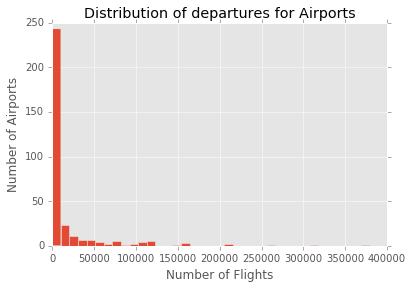

In [8]:
#HISTOGRAM DATASET(Series)
dfhist=dfq1['ORIGIN'].value_counts()
#AUTOMATICALLY ADJUST BIN NUMBER
bins = np.linspace(0, dfhist.max(), num=math.ceil(dfhist.max()/10000))
#PLOT
plt.hist(dfhist,bins)
#PLOT LABELS
plt.title('Distribution of departures for Airports')
plt.xlabel('Number of Flights')
plt.ylabel('Number of Airports')


However, it can be seen that this plot does not give us a good level of detail for the airports with less that 10.000 flights. For that reason, the following plot was created.

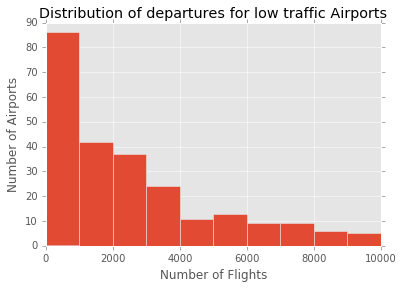

In [9]:
#HISTOGRAM DATASET(Series)
dfhist=dfq1['ORIGIN'].value_counts()
#MANUALLY SET BIN WIDTH(1000) AND BIN NUMBER(11)
bins = np.linspace(0,10000, num=11)
#PLOT
plt.hist(dfhist,bins)
#PLOT LABELS
plt.title('Distribution of departures for low traffic Airports')
plt.xlabel('Number of Flights')
plt.ylabel('Number of Airports')

# Question 4

For Question 4 the 'MONTH' Column is needed which does not exist in any of the previous dataframes created. In this occasion,the 'MONTH' column could have been extracted previously, but it would not be computationally  efficient as larger amounts of memory would be required. With the method followed here, less memory is needed, but loading the data might take longer.

In [10]:
jan=pd.read_csv('jan.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
feb=pd.read_csv('feb.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
mar=pd.read_csv('mar.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
apr=pd.read_csv('apr.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
may=pd.read_csv('may.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
jun=pd.read_csv('jun.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
jul=pd.read_csv('jul.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
aug=pd.read_csv('aug.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
sep=pd.read_csv('sep.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
oct=pd.read_csv('oct.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
nov=pd.read_csv('nov.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
dec=pd.read_csv('dec.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEP_DELAY_NEW':np.float,'MONTH':np.float},encoding="utf-8-sig",usecols=['ORIGIN','DEP_DELAY_NEW','MONTH'])
dfq4=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec])

After the data was loaded and concatated in a single data frame (dfq4), the following steps were followed to produce the required bar plot.
1. The number of flights per month was computed using the .value_counts() method and stored in a dataframe(dfhist)
2. Similarly the number of flights per month, with delay greater than 0 minutes was computed through a boolean mask and the .count() function. The data was stored in a dataframe(delayedflights)
3. The two dataframes were concantated and had some of columns renamed appropriately
4. After the data was ready, the plot was created and it was aesthetically improved;
    * Plot Legend was created and moved outside the plot, as it was hiding a part of the actual data
    * Plot title was also added, along with x and y axis labels
    * For the x-axis, the numbers signifying months (1,2,3 etc) were replaced with Strings(January,February,March etc)

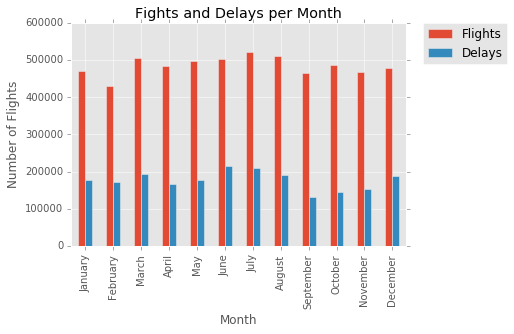

In [11]:
#HISTOGRAM DATASET(Series)
dfhist=dfq4['MONTH'].value_counts()
delayedflights=dfq4[dfq4['DEP_DELAY_NEW']>0].groupby(['MONTH']).count()
dfhist=pd.concat([dfhist,delayedflights['DEP_DELAY_NEW']],axis=1,join='inner')
dfhist.rename(columns={'MONTH':'Flights','DEP_DELAY_NEW':'Delays'}, inplace=True)

#PLOT
dfhist.plot(kind='bar')

#PLOT LABELS/VISUALISATION
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

x_labels=['January','February','March','April','May','June','July','August','September','October','November','December']

plt.xticks(range(12),x_labels)
plt.title('Fights and Delays per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')



# Question 5

Similarly to the previous questions, the dataset was loaded and organized to a single dataframe (dfq5) with the appropriate columns needed for this question 'ORIGIN','DEST','DEP_DELAY_NEW' and 'UNIQUE_CARRIER'.

At this point is should be noted the mean used in this question is the same as in Q1(column 'mean') showing the average delay of all flights per origin. 

In [12]:
jan=pd.read_csv('jan.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
feb=pd.read_csv('feb.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
mar=pd.read_csv('mar.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
apr=pd.read_csv('apr.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
may=pd.read_csv('may.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
jun=pd.read_csv('jun.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
jul=pd.read_csv('jul.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
aug=pd.read_csv('aug.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
sep=pd.read_csv('sep.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
oct=pd.read_csv('oct.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
nov=pd.read_csv('nov.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
dec=pd.read_csv('dec.csv',sep=",", index_col=False,dtype={'ORIGIN':np.str,'DEST':np.str,'DEP_DELAY_NEW':np.float,'UNIQUE_CARRIER':np.str},encoding="utf-8-sig",usecols=['ORIGIN','DEST','DEP_DELAY_NEW','UNIQUE_CARRIER'])
dfq5=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec])

Initially, by using the method .pivot_table for the dataframe(dfq5), the fights were organized by a single origin to a number of possible destinations for every carrier that does that route. 

These were sorted by minimum mean delay within a single route. 
It should be noted that the aggregate function mean was used as before.

In [13]:
A=pd.pivot_table(dfq5,values='DEP_DELAY_NEW',index=['ORIGIN','DEST','UNIQUE_CARRIER'],aggfunc=('mean'))
A

ORIGIN  DEST  UNIQUE_CARRIER
ABE     ATL   DL                 4.876106
              EV                11.147959
              OO                 7.960784
        DTW   EV                13.909326
        ORD   EV                14.921379
ABI     DFW   MQ                10.946091
ABQ     ATL   DL                 9.776655
        BWI   WN                12.075704
        CLT   AA                 2.521739
              US                 8.000000
        DAL   WN                13.255543
        DEN   EV                 6.520833
              OO                11.157480
              UA                17.334471
              WN                13.172277
        DFW   AA                12.934469
        HOU   WN                10.132483
        IAH   EV                12.784530
              OO                11.962085
              UA                10.112903
        JFK   B6                18.732441
        LAS   WN                10.675872
        LAX   OO                11.284394
     

However, if we are interested in creating a table with the best airline for a particular origin and destination, this can be done through a series of methods as used below. 
The columns ORIGIN,DEST and UNIQUE_CARRIER were grouped, then the .mean() function was called for the DEP_DELAY_NEW, NaN values in DEP_DELAY_NEW were removed by dropping the subsequent row and then indices were reset.
Finally, the dataframe was regrouped by ORIGIN and DEST, calling the .min() function leaving us with table shown below.

In [14]:
dfq5B=dfq5.groupby(['ORIGIN','DEST','UNIQUE_CARRIER']).mean().dropna().reset_index()
B=dfq5B.groupby(['ORIGIN','DEST']).min()

B

UNIQUE_CARRIER  DEP_DELAY_NEW
ORIGIN DEST                              
ABE    ATL              DL       4.876106
       DTW              EV      13.909326
       ORD              EV      14.921379
ABI    DFW              MQ      10.946091
ABQ    ATL              DL       9.776655
       BWI              WN      12.075704
       CLT              AA       2.521739
       DAL              WN      13.255543
       DEN              EV       6.520833
       DFW              AA      12.934469
       HOU              WN      10.132483
       IAH              EV      10.112903
       JFK              B6      18.732441
       LAS              WN      10.675872
       LAX              OO      11.284394
       MCI              WN      11.763006
       MCO              WN      11.939394
       MDW              WN      11.974576
       MSP              DL       6.865854
       OAK              WN      11.794489
       ORD              MQ      15.050485
       PDX              WN       7.741176
       PHX              AA       0.000000
       SAN              WN      10.125749
       SEA              AS       2.263014
       SFO              OO      18.833795
       SLC              DL       1.893701
ABR    MSP              OO      12.488404
ABY    ATL              EV      12.216981
ACK    BOS              B6      10.479675
...                    ...            ...
TYS    EWR              EV       4.628049
       IAD              EV      31.714286
       IAH              EV      12.147887
       LEX              EV      89.000000
       LGA              MQ      37.918033
       ORD              EV      13.028360
UST    IAD              F9      11.333333
       TTN              F9      18.916129
VEL    SLC              OO       6.680000
VLD    ATL              EV      10.017734
VPS    ATL              DL       9.448128
       DFW              EV      16.675000
       IAH              EV      11.663636
WRG    KTN              AS      10.907042
       PSG              AS      11.164804
WYS    SLC              OO       4.778846
XNA    ATL              DL       5.463866
       CVG              EV       3.694444
       DEN              EV       9.241379
       DFW              AA       0.200000
       EWR              EV      22.242424
       IAH              EV       0.000000
       LGA              MQ      23.417132
       MSP              DL       0.000000
       ORD              AA       0.000000
       SFO              OO       9.385965
       SLC              OO       0.000000
YAK    CDV              AS       8.181058
       JNU              AS       4.283333
YUM    PHX              OO       7.163959

[4693 rows x 2 columns]

## Finding the best airline for a given ale-retour trip

In order to gain familiarity with the use of Python and pandas, two different functions were created returning the same result.

The first function "BestAirline" uses boolean masking to select the appropriate rows for the ale-retour trip from the dataframe as specified (dfq5B). After the rows are selected they are merged together using inner join on the unique carrier.

The best airline is defined as the one that has the minimum sum of the mean delays for the two-way trip.

In [15]:
def BestAirline(ORIG, DEST,df):
    go=df[(df['ORIGIN']==ORIG) & (df['DEST']==DEST)]
    ret=df[(df['DEST']==ORIG) & (df['ORIGIN']==DEST)]
    join=pd.merge(go,ret,how='inner',on=['UNIQUE_CARRIER'],suffixes=('_GO','_RETURN'))
    join['SUM_OF_MEAN_DELAYS']=join['DEP_DELAY_NEW_GO']+join['DEP_DELAY_NEW_RETURN']
    final=join.drop(['DEP_DELAY_NEW_GO','DEP_DELAY_NEW_RETURN','ORIGIN_RETURN','DEST_RETURN'], axis=1).min()
       
    return (final)

BestAirline('XNA','ATL',dfq5B)

ORIGIN_GO                 XNA
DEST_GO                   ATL
UNIQUE_CARRIER             DL
SUM_OF_MEAN_DELAYS    13.8424
dtype: object

The second function "BestAirlineV2" uses the multiindexing of pandas to select the appropriate rows and then they are concantated with an inner join, and then they are grouped and the minimum is selected. 

The result as expected is the same as the one from the function "BestAirline".

In [16]:
def BestAirlineV2(ORIG, DEST,df):
    df5D=df.groupby(['ORIGIN','DEST','UNIQUE_CARRIER']).mean().dropna()
    D=df5D.loc[([ORIG],[DEST]),['DEP_DELAY_NEW']]
    E=df5D.loc[([DEST],[ORIG]),['DEP_DELAY_NEW']]
    join5D=pd.concat([D,E], keys="UNIQUE_CARRIER", join='inner')
    bestairline=join5D.reset_index().groupby(['UNIQUE_CARRIER'])['DEP_DELAY_NEW'].sum().reset_index().min()
    return bestairline
BestAirlineV2('XNA','ATL', dfq5)

UNIQUE_CARRIER         DL
DEP_DELAY_NEW     13.8424
dtype: object